In [0]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from cbow_mode import CBOWmode
%matplotlib inline

In [2]:
sent = """Deep Learning has evolved from Artificial Neural Networks, which has been
there since the 1940s. Neural Networks are interconnected networks of processing units
called artificial neurons that loosely mimic axons in a biological brain. In a biological
neuron, the dendrites receive input signals from various neighboring neurons, typically
greater than 1000. These modified signals are then passed on to the cell body or soma of
the neuron, where these signals are summed together and then passed on to the axon of the
neuron. If the received input signal is more than a specified threshold, the axon will
release a signal which again will pass on to neighboring dendrites of other neurons. Figure
2-1 depicts the structure of a biological neuron for reference. The artificial neuron units
are inspired by the biological neurons with some modifications as per convenience. Much
like the dendrites, the input connections to the neuron carry the attenuated or amplified
input signals from other neighboring neurons. The signals are passed on to the neuron, where
the input signals are summed up and then a decision is taken what to output based on the
total input received. For instance, for a binary threshold neuron an output value of 1 is
provided when the total input exceeds a pre-defined threshold; otherwise, the output stays
at 0. Several other types of neurons are used in artificial neural networks, and their
implementation only differs with respect to the activation function on the total input to
produce the neuron output. In Figure 2-2 the different biological equivalents are tagged in
the artificial neuron for easy analogy and interpretation."""

xtrain, ytrain, word2idx, idx2word, vocab_size = CBOWmode().acceptString(sent)


[(['deep', 'learning', 'evolved', 'from'], 'has'), (['learning', 'has', 'from', 'artificial'], 'evolved'), (['has', 'evolved', 'artificial', 'neural'], 'from'), (['evolved', 'from', 'neural', 'networks'], 'artificial'), (['from', 'artificial', 'networks', 'which'], 'neural'), (['artificial', 'neural', 'which', 'has'], 'networks'), (['neural', 'networks', 'has', 'been'], 'which'), (['networks', 'which', 'been', 'there'], 'has'), (['which', 'has', 'there', 'since'], 'been'), (['has', 'been', 'since', 'the'], 'there'), (['been', 'there', 'the', '1940s'], 'since'), (['there', 'since', '1940s', 'neural'], 'the'), (['since', 'the', 'neural', 'networks'], '1940s'), (['the', '1940s', 'networks', 'are'], 'neural'), (['1940s', 'neural', 'are', 'interconnected'], 'networks'), (['neural', 'networks', 'interconnected', 'networks'], 'are'), (['networks', 'are', 'networks', 'of'], 'interconnected'), (['are', 'interconnected', 'of', 'processing'], 'networks'), (['interconnected', 'networks', 'processi

In [0]:
class CBOW(nn.Module):
  def __init__(self, vocab_size, embedding_dim=128):
    super(CBOW, self).__init__()
    self.input_embedding = nn.Embedding(vocab_size,embedding_dim)
    self.output_embedding = nn.Linear(embedding_dim,vocab_size)
    self.activation_function = nn.LogSoftmax(dim=-1)

  def forward(self, inputs):
    hidden = sum(self.input_embedding(inputs)).view(1,-1)
    out = self.output_embedding(hidden)
    out = self.activation_function(out)
    return out

cbow = CBOW(vocab_size)

In [35]:
cbow

CBOW(
  (input_embedding): Embedding(125, 128)
  (output_embedding): Linear(in_features=128, out_features=125, bias=True)
  (activation_function): LogSoftmax()
)

In [0]:
loss_func = nn.NLLLoss()
optimizer = optim.Adam(cbow.parameters(), lr=0.001)

In [39]:
epochs = 10000
for i in range(epochs):
  total_loss = 0
  for _x, _y in zip(xtrain, ytrain):
    _x = torch.tensor(_x, dtype=torch.long)
    _y = torch.tensor([_y], dtype=torch.long)
    cbow.zero_grad()
    preds = cbow(_x)
    loss = loss_func(preds, _y)
    loss.backward()
    optimizer.step()
    total_loss += loss.data

  if i%10 == 0:
    print('Epoch: {} || Loss : {:.9f}'.format(i, total_loss))
print('Optimization Complete')

Epoch: 0 || Loss : 9.485545158
Epoch: 10 || Loss : 8.554885864
Epoch: 20 || Loss : 6.908744335
Epoch: 30 || Loss : 5.954354763
Epoch: 40 || Loss : 5.290108204
Epoch: 50 || Loss : 4.781785011
Epoch: 60 || Loss : 4.409127235
Epoch: 70 || Loss : 4.144235134
Epoch: 80 || Loss : 3.952785730
Epoch: 90 || Loss : 3.809466839
Epoch: 100 || Loss : 3.690440655
Epoch: 110 || Loss : 3.589958906
Epoch: 120 || Loss : 3.495981216
Epoch: 130 || Loss : 3.415200233
Epoch: 140 || Loss : 3.351291418
Epoch: 150 || Loss : 3.313579559
Epoch: 160 || Loss : 3.274981737
Epoch: 170 || Loss : 3.243943930
Epoch: 180 || Loss : 3.209675312
Epoch: 190 || Loss : 3.178027868
Epoch: 200 || Loss : 3.146696806
Epoch: 210 || Loss : 3.118318796
Epoch: 220 || Loss : 3.095330477
Epoch: 230 || Loss : 3.078472853
Epoch: 240 || Loss : 3.065134525
Epoch: 250 || Loss : 3.055623293
Epoch: 260 || Loss : 3.048562527
Epoch: 270 || Loss : 3.044171095
Epoch: 280 || Loss : 3.039715767
Epoch: 290 || Loss : 3.034532547
Epoch: 300 || Loss : 

In [41]:
cbow.input_embedding.weight

Parameter containing:
tensor([[ 3.0215,  1.2937,  1.4516,  ...,  3.2231,  0.0474,  3.2007],
        [-0.6527,  1.0256, -0.7541,  ...,  0.4343,  0.1671,  2.4930],
        [-1.5068, -0.9981,  2.1132,  ..., -2.5933,  2.3292,  1.3337],
        ...,
        [ 0.5691,  0.5858, -0.8781,  ..., -0.7339,  0.1027, -1.2055],
        [ 0.1784,  4.0685,  0.7740,  ..., -3.3073,  1.1522, -0.3599],
        [-0.2432,  1.9286, -2.2815,  ..., -0.9852, -1.0373,  1.8692]],
       requires_grad=True)

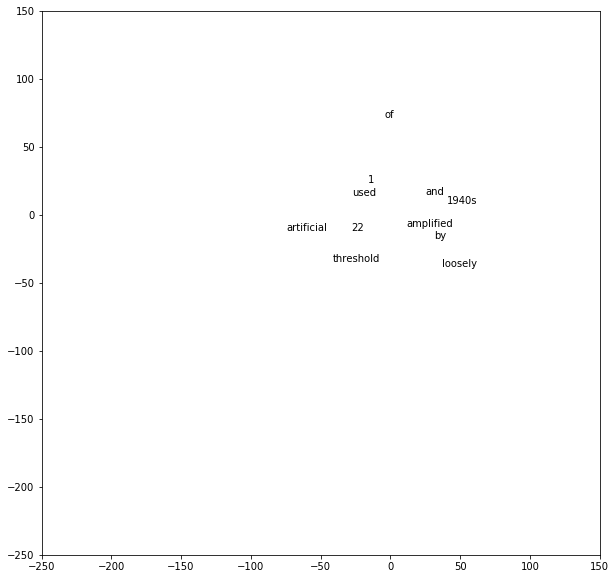

In [70]:
W_embedded = TSNE(n_components=2).fit_transform(cbow.input_embedding.weight.detach().numpy())
plt.figure(figsize=(10,10))
for i in range(len(W_embedded[:11, :])):
  plt.text(W_embedded[i,0],W_embedded[i,1],idx2word[i])
plt.xlim(-250,150)
plt.ylim(-250,150)
plt.show()